In [ ]:
Q1] Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion matrix.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
#a) data Pre-processing 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
#b.define cnn model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)

C:\Users\saksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8428 - loss: 0.5165 - val_accuracy: 0.9825 - val_loss: 0.0630
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9780 - loss: 0.0707 - val_accuracy: 0.9867 - val_loss: 0.0508
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9890 - val_loss: 0.0437
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9897 - loss: 0.0341 - val_accuracy: 0.9853 - val_loss: 0.0492
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9905 - val_loss: 0.0389


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0375
Test Accuracy: 98.96%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


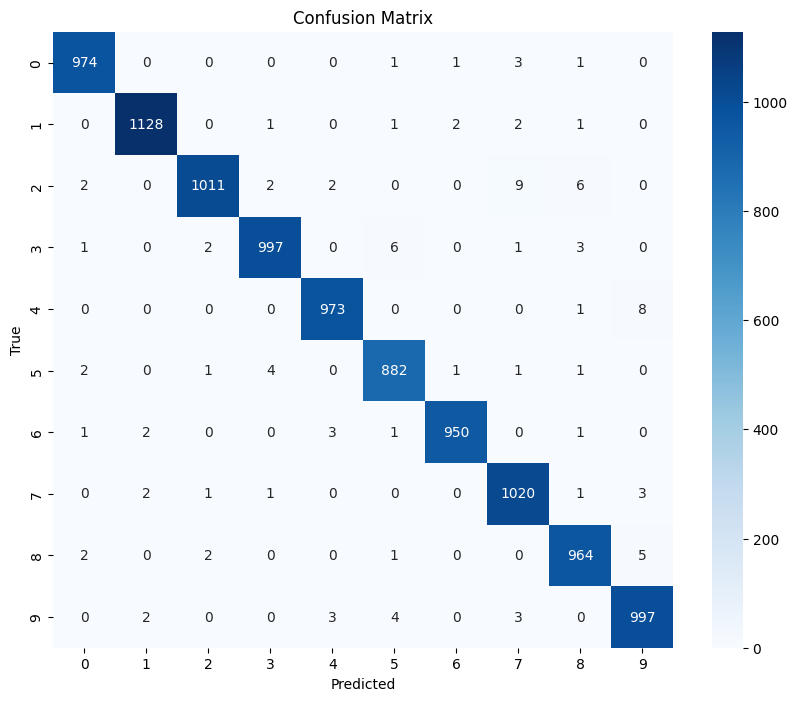

In [7]:
#c. Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict classes
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
'''The reshape() function in NumPy (or TensorFlow/Keras backend) is used to change the shape of an array without changing its data.
•  -1: This tells Python to automatically figure out the number of samples (here it's 60,000).
•  28: Height of image.
•  28: Width of image.
•  1: Number of channels → 1 means grayscale.''''
